In [1]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.60k/3.60k [00:00<00:00, 1.84MB/s]

Extracting files...
Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\uciml\iris\versions\2


In [6]:
import os
import pandas as pd

csv_path = os.path.join(path, "iris.csv")
df=pd.read_csv(csv_path)
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [45]:
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [32]:
# df.drop(columns=["Id"], inplace=True)
label = LabelEncoder()
stand= StandardScaler()
features = df.drop(columns=["Species"])
species = df["Species"]
features_pp = stand.fit_transform(features)
species_pp = label.fit_transform(species)
iris = pd.DataFrame(features_pp, columns=features.columns)
iris["Species"] = species_pp
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


In [42]:
iris['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

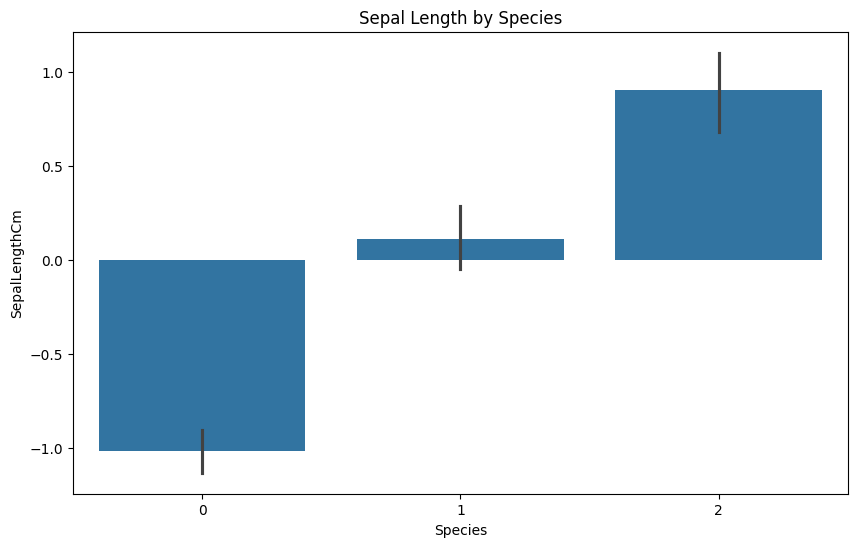

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=iris, x='Species', y='SepalLengthCm')
plt.title('Sepal Length by Species')
plt.show()

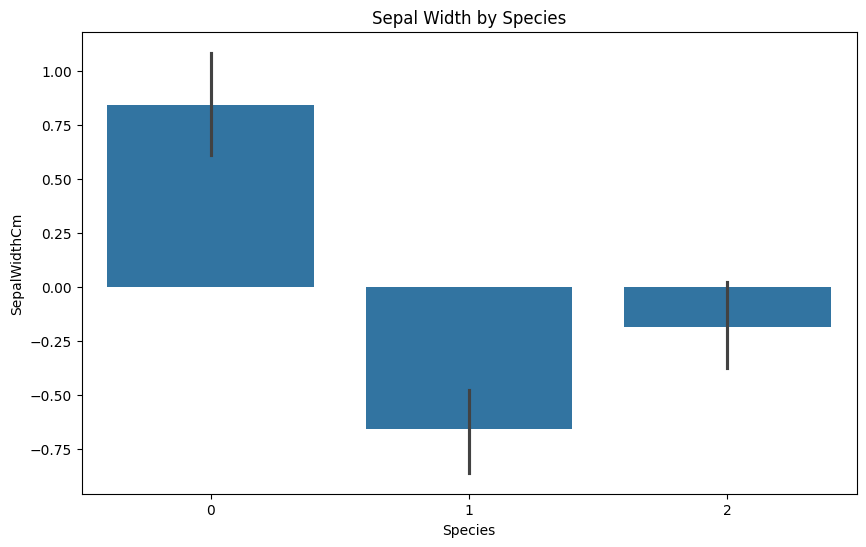

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(data=iris, x='Species', y='SepalWidthCm')
plt.title('Sepal Width by Species')
plt.show()


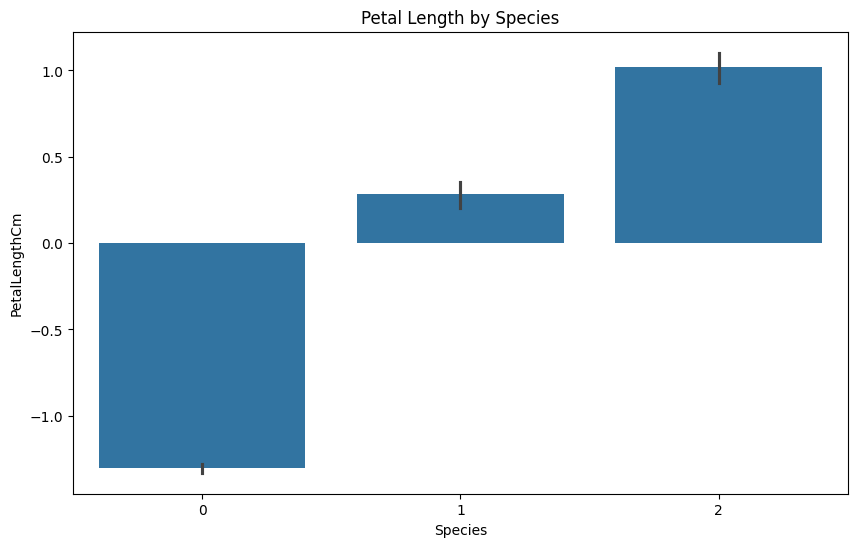

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(data=iris, x='Species', y='PetalLengthCm')
plt.title('Petal Length by Species')
plt.show()

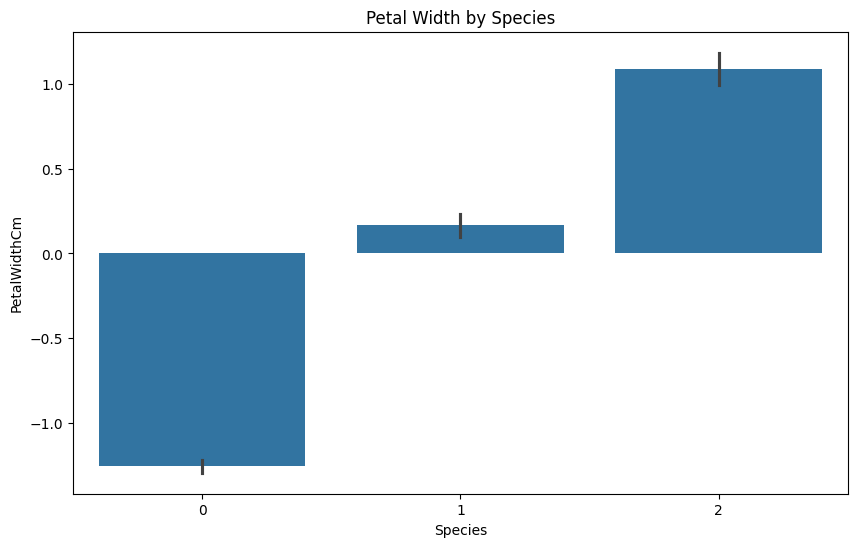

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=iris, x='Species', y='PetalWidthCm')
plt.title('Petal Width by Species')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

In [58]:
x= iris.drop(columns=["Species"])
y= iris["Species"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

In [68]:
tree = DecisionTreeClassifier(random_state=7)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
tree.score(x_test, y_test)


0.9

In [76]:
print("accuracy_score: ",accuracy_score(y_test, y_pred))

accuracy_score:  0.9


In [61]:
logic_reg = LogisticRegression(max_iter=200, random_state=7)
logic_reg.fit(x_train, y_train)
y_pred = logic_reg.predict(x_test)
logic_reg.score(x_test, y_test)

0.8666666666666667

In [ ]:
print("accuracy_score: ",accuracy_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("precision_score: ",precision_score(y_test, y_pred))
print("f1_score: ",f1_score(y_test, y_pred))

accuracy_score:  0.8666666666666667
recall_score:  0.883838383838384
precision_score:  0.883838383838384
f1_score:  0.883838383838384
